In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Exercise 3



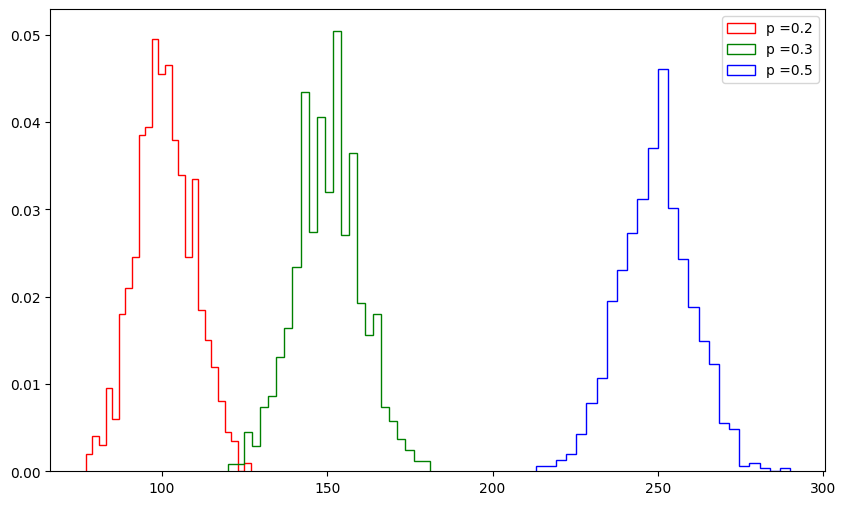

In [22]:
def generate_multinomial(n, p, nsim):

    observations = np.random.multinomial(n, p, size=nsim)
    return observations

def plot_multinomial(n, p, nsim):
    obs = generate_multinomial(n, p, nsim)
    num_outcomes = len(p)

    fig, ax = plt.subplots(figsize=(10, 6))
    plt.hist(obs[:, 0], density=True, bins=25, histtype='step', color='red', label=f'p ={p[0]}')
    plt.hist(obs[:, 1], density=True, bins=25, histtype='step', color='green', label=f'p ={p[1]}')
    plt.hist(obs[:, 2], density=True, bins=25, histtype='step', color='blue', label=f'p ={p[2]}')
    ax.legend()
    plt.show()

n = 500
p = [0.2, 0.3, 0.5]
nsim = 1000
plot_multinomial(n, p, nsim)

Exercise 4


Generated data shape: (5000, 2)


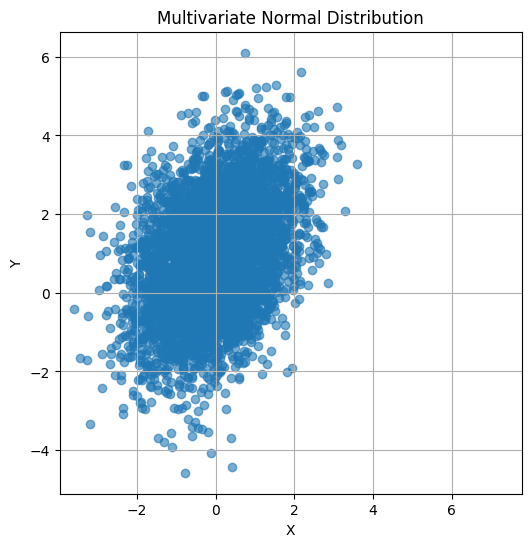

In [23]:
def generate_multivariate_normal(mu, cov, nsim):
    mu = np.array(mu)
    cov = np.array(cov)
    observations = np.random.multivariate_normal(mu, cov, nsim)
    return observations

def plot_multivariate_normal(data):
    x = data[:, 0]
    y = data[:, 1]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.6)
    plt.title('Multivariate Normal Distribution')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis('square')
    plt.grid(True)
    plt.show()


mean_vector = [0, 1]
covariance_matrix = [[1, 0.5], [0.5, 2]]
num_simulations = 5000

generated_data = generate_multivariate_normal(mean_vector, covariance_matrix, num_simulations)
print("Generated data shape:", generated_data.shape)

plot_multivariate_normal(generated_data)


Exercise 5

In [35]:
from scipy.stats import pearsonr
def simulate_multivariate_normal(mu, sigma, n_samples=100):
  #sample
  obs = np.random.multivariate_normal(mu, cov, n_samples)
  #plot
  '''plt.figure(figsize=(12,8))
  x = obs[:, 0]
  y = obs[:, 1]
  plt.scatter(x, y)
  plt.axis('square')
  plt.grid(True)
  plt.show'''

  #sample mean and cov
  sample_mu = np.mean(obs, axis = 0)
  sample_cov = (1 / n_samples) * (obs - sample_mu).T.dot(obs - sample_mu)

  #correlation
  analythical_rho = sigma[0, 1] / np.sqrt(sigma[0, 0] * sigma[1, 1])
  sample_rho = sample_cov[0, 1] / np.sqrt(sample_cov[0, 0] * sample_cov[1, 1])


  #parametric bootstrap percentile interval for ro
  nsim = 1000
  rho_boot = np.empty(0)
  for _ in range(nsim):
    sample = np.random.multivariate_normal(sample_mu, sample_cov, n_samples)

    bootstrap_rho, _ = pearsonr(sample[:, 0], sample[:, 1])
    rho_boot = np.append(rho_boot, bootstrap_rho)

  bootstrap_ci_lower = np.quantile(rho_boot, 0.025)
  bootstrap_ci_upper = np.quantile(rho_boot, 0.975)

  #Fisher method for confidence interval
  theta_cap = (np.log(1 + sample_rho) - np.log(1 - sample_rho)) / 2
  se_theta_cap = 1 / (np.sqrt(n_samples - 3))
  z = norm.ppf(0.975)
  a, b = (theta_cap - z * se_theta_cap, theta_cap + z * se_theta_cap)
  fisher_ci_lower = (np.exp(2 * a) - 1)/(np.exp(2 * a) + 1)
  fisher_ci_upper = (np.exp(2 * b) - 1)/(np.exp(2 * b) + 1)

  simulation_results = {
        "estimated_mu": sample_mu,
        "estimated_covariance_matrix": sample_cov,
        "analytical_rho": analythical_rho,
        "sample_rho": sample_rho,
        "bootstrap_ci": (bootstrap_ci_lower, bootstrap_ci_upper),
        "fisher_ci": (fisher_ci_lower, fisher_ci_upper)
    }
  return simulation_results

mu = np.array([3, 8])
cov = np.array([[1, 1], [1, 2]])
simulation_results = simulate_multivariate_normal(mu, cov)
print("Analytical correlation (ρ):", simulation_results["analytical_rho"])
print("Sample correlation (ρ):", simulation_results["sample_rho"])
print("Bootstrap 95% CI for ρ:", simulation_results["bootstrap_ci"])
print("Fisher's method 95% CI for ρ:", simulation_results["fisher_ci"])

Analytical correlation (ρ): 0.7071067811865475
Sample correlation (ρ): 0.7568618977220737
Bootstrap 95% CI for ρ: (0.6695560842845597, 0.8288640133701977)
Fisher's method 95% CI for ρ: (0.6583088949489325, 0.8299051611620012)


Exercise 6

In [36]:
from tqdm import tqdm
#This takes like half an hour on colab and gives back 100% on the coverages maybe mistakes were made but the exercise is so senseless i'm not gonna bother fixing it
mu = np.array([3, 8])
cov = np.array([[1, 1], [1, 2]])
bootstrap_coverage = 0
fisher_coverage = 0
for _ in tqdm(range(1000)):
  simulation_results = simulate_multivariate_normal(mu, cov)
  if simulation_results["bootstrap_ci"][0] <= simulation_results["sample_rho"] <= simulation_results["bootstrap_ci"][1]:
    bootstrap_coverage += 1
  if simulation_results["fisher_ci"][0] <= simulation_results["sample_rho"] <= simulation_results["fisher_ci"][1]:
    fisher_coverage += 1
bootstrap_coverage_percentage = (bootstrap_coverage / 1000) * 100
fisher_coverage_percentage = (fisher_coverage / 1000) * 100
print("Bootstrap coverage percentage:", bootstrap_coverage_percentage)
print("Fisher coverage percentage:", fisher_coverage_percentage)

100%|██████████| 1000/1000 [24:25<00:00,  1.47s/it]

Bootstrap coverage percentage: 100.0
Fisher coverage percentage: 100.0
